In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('/Users/kratikaaggarwal/Desktop/UMBC/DATA 602/Week5/mlb.csv')

In [3]:
data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
data.isnull().sum()/len(data)*100

AtBat         0.000000
Hits          0.000000
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         0.000000
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.000000
CRuns         0.000000
CRBI          0.000000
CWalks        0.000000
League        0.000000
Division      0.000000
PutOuts       0.000000
Assists       0.000000
Errors        0.000000
Salary       18.322981
NewLeague     0.000000
dtype: float64

In [5]:
data = data.dropna()

In [6]:
data_target = data.Salary
data_target

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [7]:
data_features = data.drop(['League','Division','NewLeague','Salary'],axis=1)
data_features

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [8]:
#import train data (smaller)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_features, data_target, test_size = 0.25, random_state=5)

Lasso Performs best when all numerical features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data. Furthermore, we obtain all necessary statistics for our features (mean and standard deviation) from training data and also use them on test data. Note that we don’t standardize our dummy variables (which only have values of 0 or 1).

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[data_features.columns]) 

X_train[data_features.columns] = scaler.transform(X_train[data_features.columns])

X_test[data_features.columns] = scaler.transform(X_test[data_features.columns])

In [10]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
54,-0.012440,-0.168630,0.036841,-0.402924,0.062802,-0.123657,1.126035,1.267861,1.270561,1.368454,1.388926,1.198245,1.236258,0.075501,-0.752804,-0.567612
99,0.131714,0.034069,0.388020,0.575096,-0.175120,-0.264468,-0.005745,-0.178907,-0.230927,-0.356375,-0.012031,-0.456365,0.075891,-0.013363,-0.752804,-0.859188
68,0.797564,0.754775,0.973317,0.457733,1.371369,0.157966,-0.684813,-0.808873,-0.806073,-0.571979,-0.814521,-0.695140,-0.703460,-0.698360,0.895311,2.056575
214,-0.513544,-0.709160,0.856258,-0.324683,0.062802,-0.686902,-0.232101,-0.275677,-0.278431,0.344337,-0.311264,-0.072979,-0.344092,-0.542847,-0.738837,-0.421824
278,1.044684,0.754775,1.090377,0.105646,1.173101,-0.874651,2.484171,2.996796,3.228433,2.783353,2.718475,3.327042,1.028431,3.200565,-0.424578,-0.276035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,-0.026168,-0.371328,0.622139,-0.246441,0.578298,1.096709,1.352391,1.294688,1.105991,2.540799,1.514740,1.951563,2.708364,-1.094547,-0.794705,-1.296553
96,1.099600,0.889908,1.441555,1.357512,2.085133,1.659954,1.578747,2.291617,2.380135,3.241511,2.708273,3.108445,2.383635,-0.013363,-0.731854,-0.567612
152,-0.870495,-0.506461,-0.899635,-0.872374,-0.532002,0.157966,-1.363881,-1.066130,-1.007968,-0.814533,-1.038946,-0.913736,-0.846340,-0.716873,-0.766771,-1.004976
237,-1.158801,-1.182123,-0.665516,-0.559408,-1.285419,-0.968525,-0.458457,-0.597128,-0.595695,-0.545029,-0.586695,-0.621153,-0.586557,-0.457685,-0.787722,-0.713400


In [11]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.1)
reg.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+05, tolerance: 3.807e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [12]:
print('R squared training set', round(reg.score(X_train, Y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, Y_test)*100, 2))

R squared training set 62.78
R squared test set 15.19


In [13]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 71929.84
MSE test set 195927.5


In [14]:
reg.coef_

array([-189.02067146,  329.92505766,   29.94442233, -143.6773603 ,
        -57.95176354,  149.3731387 ,  -14.96454242, -503.58483432,
         65.78717512,   30.92403496,  650.69275835,  144.82010265,
       -148.55503755,   68.65638936,   17.30866252,    2.45106243])

In [15]:
reg.intercept_

536.0275939086295

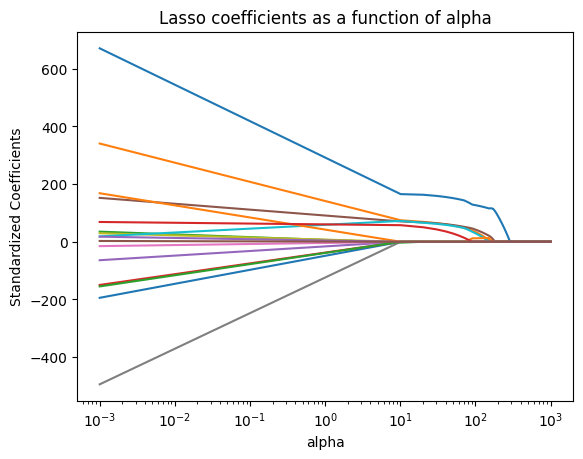

In [16]:
import numpy as np
alpha_values = np.linspace(0.001, 1000, 100)
model_lasso = Lasso(max_iter=100000)
coefficients = []

for a in alpha_values:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, Y_train)
    coefficients.append(model_lasso.coef_)

ax = plt.gca()

ax.plot(alpha_values, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [17]:
pred = reg.predict(X_test)
diff = Y_test-pred

data_test = pd.DataFrame({'y_test':Y_test, 'pred': pred, 'diff': abs(diff)})

sort_min = data_test.sort_values('diff')
sort_min.head(5)

,y_test,pred,diff
29,900.0,900.502171,0.502171
7,100.0,102.059393,2.059393
25,765.0,761.963212,3.036788
135,90.0,103.837235,13.837235
239,130.0,161.534717,31.534717


In [18]:
from sklearn.linear_model import LassoCV

# Lasso with 10 fold cross-validation
model = LassoCV(cv=10, random_state=0, max_iter=100000)

# Fit model
model.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=100000, random_state=0)

In [19]:
model.alpha_

2.341177211768841

In [20]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, Y_train)

Lasso(alpha=2.341177211768841)

### Coefficients for best Model

In [21]:
print(list(zip(lasso_best.coef_, data_features)))

[(-160.9232174149864, 'AtBat'), (240.298253927892, 'Hits'), (-15.11838671964281, 'HmRun'), (-61.726688142254275, 'Runs'), (-1.0018248971648893, 'RBI'), (120.57938524392122, 'Walks'), (-46.18943783534828, 'Years'), (-115.19842266520925, 'CAtBat'), (0.0, 'CHits'), (97.17955197361762, 'CHmRun'), (399.7353595111693, 'CRuns'), (0.0, 'CRBI'), (-103.57571694656536, 'CWalks'), (65.2310462123936, 'PutOuts'), (1.8088964447429452, 'Assists'), (0.0, 'Errors')]


In [22]:
print('R squared training set', round(lasso_best.score(X_train, Y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, Y_test)*100, 2))

R squared training set 61.56
R squared test set 17.05


In [23]:
mean_squared_error(Y_test, lasso_best.predict(X_test))

191630.3359479723

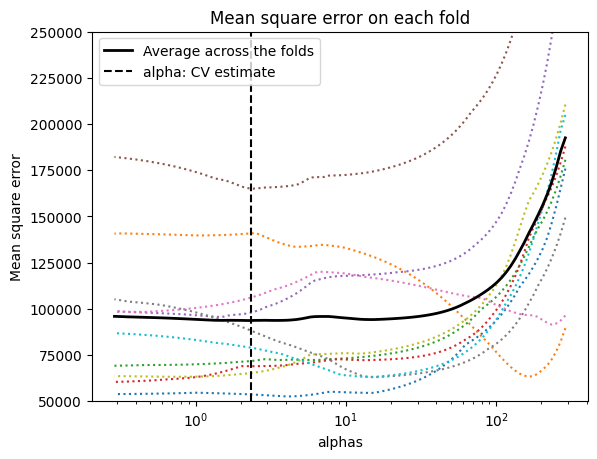

In [24]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

In [25]:
list(zip(lasso_best.coef_, data_features))

[(-160.9232174149864, 'AtBat'),
 (240.298253927892, 'Hits'),
 (-15.11838671964281, 'HmRun'),
 (-61.726688142254275, 'Runs'),
 (-1.0018248971648893, 'RBI'),
 (120.57938524392122, 'Walks'),
 (-46.18943783534828, 'Years'),
 (-115.19842266520925, 'CAtBat'),
 (0.0, 'CHits'),
 (97.17955197361762, 'CHmRun'),
 (399.7353595111693, 'CRuns'),
 (0.0, 'CRBI'),
 (-103.57571694656536, 'CWalks'),
 (65.2310462123936, 'PutOuts'),
 (1.8088964447429452, 'Assists'),
 (0.0, 'Errors')]

Lasso regression, turned the coefficients that were not siginificant into zero. Hence it removed the variables that were not important. 